In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sonar (2).csv


In [2]:
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
from keras.layers import Dense
from keras.layers import Dropout
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
dataset=pd.read_csv("/kaggle/input/sonar (2).csv")

In [5]:
dataset.groupby("R/M").size()

R/M
M    111
R     97
dtype: int64

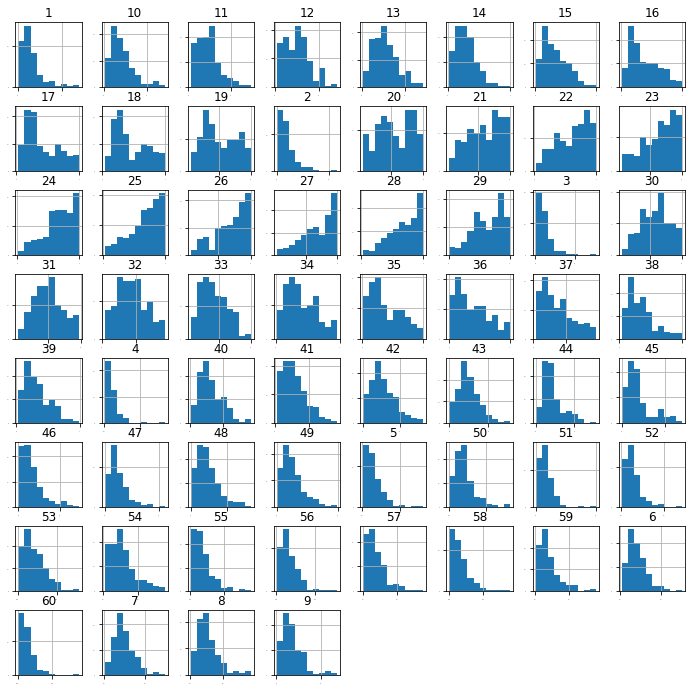

In [6]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

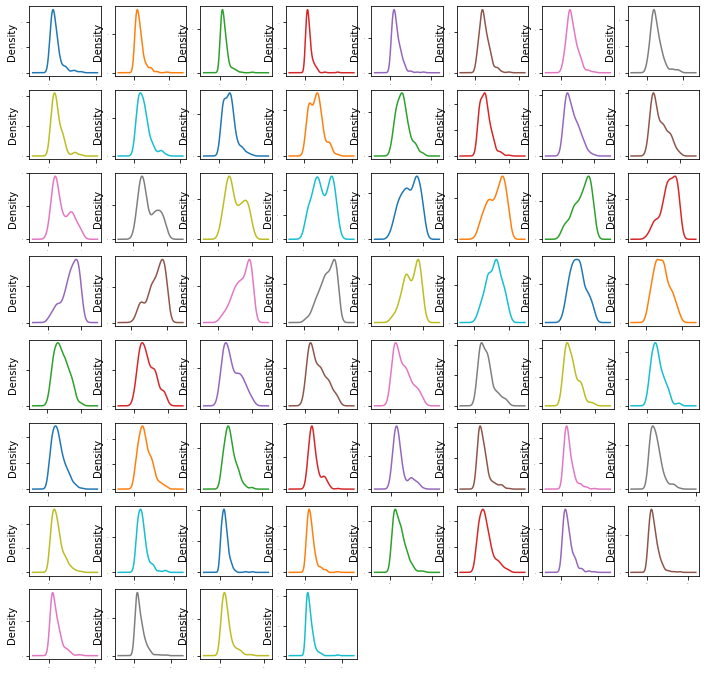

In [7]:
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
plt.show()


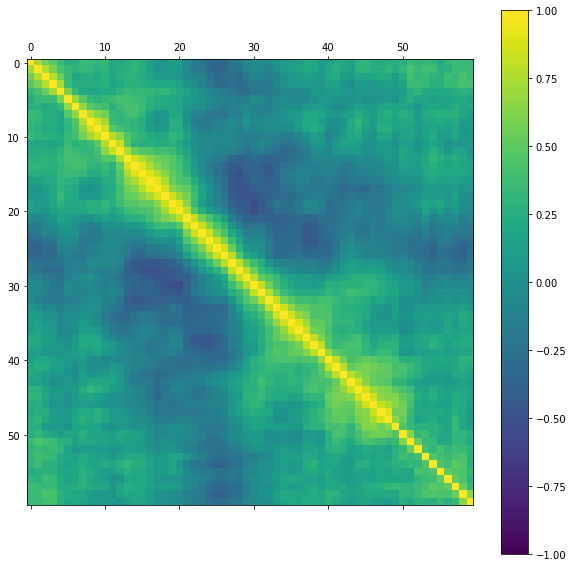

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
plt.show()

In [9]:
array=dataset.values
X = array[:,0:-1].astype(float)
Y = array[:,-1]
scaler=StandardScaler()
X=scaler.fit_transform(X)
encoder= LabelEncoder()
Y=encoder.fit_transform(Y)
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [10]:
model=Sequential()
model.add(Dense(32,input_dim=60,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(rate=0.1))
model.add(Dense(18,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(rate=0.05))
model.add(Dense(9,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=500,batch_size=512)

Epoch 1/500
166/166 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5120
Epoch 2/500
166/166 [==============================] - 0s 15us/step - loss: 0.6931 - accuracy: 0.5060
Epoch 3/500
166/166 [==============================] - 0s 17us/step - loss: 0.6931 - accuracy: 0.5060
Epoch 4/500
166/166 [==============================] - 0s 13us/step - loss: 0.6931 - accuracy: 0.5060
Epoch 5/500
166/166 [==============================] - 0s 13us/step - loss: 0.6931 - accuracy: 0.5060
Epoch 6/500
166/166 [==============================] - 0s 17us/step - loss: 0.6931 - accuracy: 0.5060
Epoch 7/500
166/166 [==============================] - 0s 13us/step - loss: 0.6930 - accuracy: 0.5060
Epoch 8/500
166/166 [==============================] - 0s 12us/step - loss: 0.6930 - accuracy: 0.5060
Epoch 9/500
166/166 [==============================] - 0s 15us/step - loss: 0.6930 - accuracy: 0.5060
Epoch 10/500
166/166 [==============================] - 0s 12us/step - loss: 0.6929

In [11]:
Y_pred=model.predict(X_validation)>0.6

In [12]:
cm=confusion_matrix(Y_validation,Y_pred)

In [13]:
print(classification_report(Y_validation,Y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.87      0.87      0.87        15

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [14]:
cm

array([[25,  2],
       [ 2, 13]])